In [1]:
import pandas as pd
import numpy as np
from io import StringIO

## Pre-Processing

In [6]:
materialData = pd.read_excel('SLiCE_Mouton2022a_SelectedElements_full_encoded.xlsx')
materialData

,Columns_0_3_Shape_6194_4,Columns_0_3_Shape_6194_4.1,Columns_0_3_Shape_6194_4.2,Columns_0_3_Shape_6194_4.3,Columns_0_53_Shape_6194_54,Columns_0_53_Shape_6194_54.1,Columns_0_53_Shape_6194_54.2,Columns_0_53_Shape_6194_54.3,Columns_0_53_Shape_6194_54.4,Columns_0_53_Shape_6194_54.5,...,indicator_ws,indicator_luosom,indicator_luobio,indicator_luourb,indicator_luoagr,indicator_luofor,indicator_lutsom,indicator_lutbio,indicator_luturb,indicator_lutagr
0,1,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6190,0,0,0,1,0,0,0,0,0,0,...,7.387558e-10,4.540077e-07,2.550980e-08,1.848040e-08,1.388847e-10,8.933202e-08,0.000002,-4.239241e-09,2.083037e-11,-1.016888e-10
6191,0,0,0,1,0,0,0,0,0,0,...,2.516953e-05,1.714760e-02,9.756391e-04,1.067963e-03,8.460303e-07,7.052431e-04,0.174979,-1.392912e-03,3.018894e-05,-7.453650e-05
6192,0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NAN

In [9]:
materialDataClean = materialData.dropna()
materialDataClean

,Columns_0_3_Shape_6194_4,Columns_0_3_Shape_6194_4.1,Columns_0_3_Shape_6194_4.2,Columns_0_3_Shape_6194_4.3,Columns_0_53_Shape_6194_54,Columns_0_53_Shape_6194_54.1,Columns_0_53_Shape_6194_54.2,Columns_0_53_Shape_6194_54.3,Columns_0_53_Shape_6194_54.4,Columns_0_53_Shape_6194_54.5,...,indicator_ws,indicator_luosom,indicator_luobio,indicator_luourb,indicator_luoagr,indicator_luofor,indicator_lutsom,indicator_lutbio,indicator_luturb,indicator_lutagr
25,1,0,0,0,0,0,0,0,0,0,...,7.673120e-02,3.816463e+02,2.100579e+01,1.742720e-01,1.768480e-02,1.894461e+02,19.047347,-3.028480e-01,1.691200e-03,-9.744000e-03
26,1,0,0,0,0,0,0,0,0,0,...,1.728089e-02,6.817287e+01,3.973314e+00,1.277602e+00,1.540516e-03,2.634870e+01,70.737053,3.525817e-01,1.764699e-02,-9.594737e-04
27,1,0,0,0,0,0,0,0,0,0,...,-2.218325e-04,6.590509e-02,3.793785e-03,3.090222e-03,1.657274e-04,9.158212e-03,0.255795,-2.495662e-03,1.550765e-05,-8.138232e-05
28,1,0,0,0,0,0,0,0,0,0,...,5.741064e-02,3.784671e+02,8.545612e+01,1.938384e-02,7.560041e+01,8.901144e-02,3.458413,-8.769600e-03,4.536000e-04,-6.199200e-04
29,1,0,0,0,0,0,0,0,0,0,...,-1.961920e-03,1.165495e+02,6.523106e+00,6.659622e-01,6.770224e-03,5.414464e+01,35.393952,5.922147e-02,8.267744e-03,-3.693760e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,0,0,0,1,0,0,0,0,0,0,...,1.224654e-05,1.103546e-02,6.218317e-04,5.318960e-04,2.510227e-06,1.565016e-03,0.073060,-4.838472e-05,2.266157e-06,-1.822387e-06
6188,0,0,0,1,0,0,0,0,0,0,...,3.621863e-08,2.467518e-05,1.403932e-06,1.536785e-06,1.217427e-09,1.014836e-06,0.000252,-2.004383e-06,4.344149e-08,-1.072571e-07
6190,0,0,0,1,0,0,0,0,0,0,...,7.387558e-10,4.540077e-07,2.550980e-08,1.848040e-08,1.388847e-10,8.933202e-08,0.000002,-4.239241e-09,2.083037e-11,-1.016888e-10
6191,0,0,0,1,0,0,0,0,0,0,...,2.516953e-05,1.714760e-02,9.756391e-04,1.067963e-03,8.460303e-07,7.052431e-04,0.174979,-1.392912e-03,3.018894e-05,-7.453650e-05


In [19]:
materialDataClean.to_excel("MaterialDataClearn.xlsx")

### Feature Selection 

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [35]:
# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data 193:215
selector.fit(materialDataClean.iloc[:, 193:215])

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selectedMaterialData = materialDataClean.iloc[:, high_variance_indices + 192]  # Adjust indices to match the original DataFrame


A higher threshold removes more features, while a lower threshold retains more features

In [36]:
selectedMaterialData.to_excel("FeatureSelection_Variance.xlsx")

Concatenate :
materialDataClean (Column 0 - 193) and selectedMaterialData (results)

In [46]:
# Select columns 0-192
materialName = materialDataClean.iloc[:, :192]# Columns 0 to 192 (193 is exclusive)
# Concatenate the first part with the selectedMaterialData (columns 193-215)
materialDataFinal = pd.concat([materialName, selectedMaterialData], axis=1)

In [118]:
materialDataFinal

,Columns_0_3_Shape_6194_4,Columns_0_3_Shape_6194_4.1,Columns_0_3_Shape_6194_4.2,Columns_0_3_Shape_6194_4.3,Columns_0_53_Shape_6194_54,Columns_0_53_Shape_6194_54.1,Columns_0_53_Shape_6194_54.2,Columns_0_53_Shape_6194_54.3,Columns_0_53_Shape_6194_54.4,Columns_0_53_Shape_6194_54.5,...,Columns_0_5_Shape_6194_6.4,Columns_0_5_Shape_6194_6.5,indicator_GWP,indicator_darf,indicator_ecofw,indicator_luosom,indicator_luobio,indicator_luoagr,indicator_luofor,indicator_lutsom
25,1,0,0,0,0,0,0,0,0,0,...,0,0,1.578135e+01,269.539312,1.018279e+01,3.816463e+02,2.100579e+01,1.768480e-02,1.894461e+02,19.047347
26,1,0,0,0,0,0,0,0,0,0,...,1,0,3.877966e+00,82.852847,1.893287e+00,6.817287e+01,3.973314e+00,1.540516e-03,2.634870e+01,70.737053
27,1,0,0,0,0,0,0,0,0,0,...,0,0,1.362014e-01,1.774864,5.883299e-01,6.590509e-02,3.793785e-03,1.657274e-04,9.158212e-03,0.255795
28,1,0,0,0,0,0,0,0,0,0,...,0,0,1.575398e+00,11.906924,-1.646886e+01,3.784671e+02,8.545612e+01,7.560041e+01,8.901144e-02,3.458413
29,1,0,0,0,0,0,0,0,0,0,...,1,0,1.936717e+00,27.801136,1.934867e+00,1.165495e+02,6.523106e+00,6.770224e-03,5.414464e+01,35.393952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6187,0,0,0,1,0,0,0,0,0,0,...,0,0,1.058796e-02,0.152439,3.886304e-03,1.103546e-02,6.218317e-04,2.510227e-06,1.565016e-03,0.073060
6188,0,0,0,1,0,0,0,0,0,0,...,0,0,7.986841e-06,0.000227,4.324038e-06,2.467518e-05,1.403932e-06,1.217427e-09,1.014836e-06,0.000252
6190,0,0,0,1,0,0,0,0,0,0,...,0,0,2.589633e-07,0.000004,1.101202e-07,4.540077e-07,2.550980e-08,1.388847e-10,8.933202e-08,0.000002
6191,0,0,0,1,0,0,0,0,0,0,...,0,0,5.550322e-03,0.157882,3.004918e-03,1.714760e-02,9.756391e-04,8.460303e-07,7.052431e-04,0.174979


In [47]:
materialDataFinal.to_excel("MmaterialDataFinal.xlsx")

## Correclation Matrix

In [179]:
from scipy import stats
import seaborn as sns


In [180]:
SLICEcorr = materialDataFinal.corr()
round(SLICEcorr,2)

,Columns_0_3_Shape_6194_4,Columns_0_3_Shape_6194_4.1,Columns_0_3_Shape_6194_4.2,Columns_0_3_Shape_6194_4.3,Columns_0_53_Shape_6194_54,Columns_0_53_Shape_6194_54.1,Columns_0_53_Shape_6194_54.2,Columns_0_53_Shape_6194_54.3,Columns_0_53_Shape_6194_54.4,Columns_0_53_Shape_6194_54.5,...,Columns_0_5_Shape_6194_6.4,Columns_0_5_Shape_6194_6.5,indicator_GWP,indicator_darf,indicator_ecofw,indicator_luosom,indicator_luobio,indicator_luoagr,indicator_luofor,indicator_lutsom
Columns_0_3_Shape_6194_4,1.00,-0.08,-0.18,-0.50,NaN,NaN,0.24,0.15,0.24,NaN,...,0.06,0.12,0.02,0.02,0.00,0.03,0.04,0.03,0.02,0.02
Columns_0_3_Shape_6194_4.1,-0.08,1.00,-0.10,-0.29,NaN,NaN,-0.02,-0.01,-0.02,NaN,...,0.02,0.08,0.01,0.01,0.00,0.03,0.03,0.02,0.03,0.03
Columns_0_3_Shape_6194_4.2,-0.18,-0.10,1.00,-0.66,NaN,NaN,-0.04,-0.03,-0.04,NaN,...,0.00,-0.02,0.01,0.01,0.00,0.01,0.00,-0.00,0.01,0.00
Columns_0_3_Shape_6194_4.3,-0.50,-0.29,-0.66,1.00,NaN,NaN,-0.12,-0.07,-0.12,NaN,...,-0.05,-0.09,-0.03,-0.03,-0.00,-0.04,-0.04,-0.03,-0.03,-0.03
Columns_0_53_Shape_6194_54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
indicator_luosom,0.03,0.03,0.01,-0.04,NaN,NaN,0.05,0.09,0.01,NaN,...,0.30,-0.04,0.37,0.54,0.38,1.00,0.82,0.32,0.95,0.93
indicator_luobio,0.04,0.03,0.00,-0.04,NaN,NaN,0.09,0.06,0.01,NaN,...,0.19,-0.04,0.24,0.35,0.01,0.82,1.00,0.81,0.59,0.59
indicator_luoagr,0.03,0.02,-0.00,-0.03,NaN,NaN,0.10,-0.00,-0.00,NaN,...,-0.01,-0.02,0.03,0.02,-0.36,0.32,0.81,1.00,-0.00,0.01
indicator_luofor,0.02,0.03,0.01,-0.03,NaN,NaN,0.01,0.10,0.01,NaN,...,0.32,-0.04,0.38,0.56,0.52,0.95,0.59,-0.00,1.00,0.98


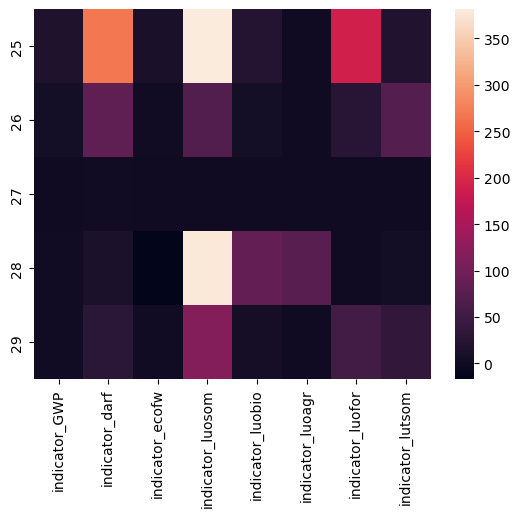

In [188]:
sns.heatmap(materialDataFinal.iloc[:5, 193:201]);

## Split data

In [147]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#### Validate the shapes
 
train_labels should be a 1D array or a 2D array with shape (n_samples, 1).
train_samples should be a 2D array with shape (n_samples, n_features).

####  Train Label and Train Sample
Where the Label will be y (dependent)
Sample will be independent

In [94]:
print("Shape of y:", materialDataFinal['indicator_GWP'].shape)
print("Shape of first part:", materialDataFinal.iloc[:, 1:193].values.shape)
print("Shape of second part:", materialDataFinal.iloc[:, 194:201].values.shape)

Shape of y: (4181,)
Shape of first part: (4181, 192)
Shape of second part: (4181, 7)


In [98]:
#print(materialDataFinal.iloc[:, 1:193]).head
#print(materialDataFinal.iloc[:, 194:201]).head

In [163]:
# Extracting labels (target variable)
train_labels = np.array(materialDataFinal['indicator_GWP']) #193

# Extracting and combining feature columns
feature_part1 = materialDataFinal.iloc[:, 1:193].values  # Features from columns 1 to 193, to keep the entire encodeing inside the dataset
feature_part2 = materialDataFinal.iloc[:, 194:201].values  # Features from columns 195 to 200, to feature select the

# Combining feature parts
train_samples = np.hstack([feature_part1, feature_part2])

# Shuffle the dataset
train_samples, train_labels = shuffle(train_samples, train_labels, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size=0.25, random_state=42)

# Now X_train, X_test, y_train, and y_test are ready for use in your Keras model

In [149]:
# Print shapes to verify
print("Shape of train_labels:", train_labels.shape)  # Expected shape: (4181,)
print("Shape of train_samples:", train_samples.shape)  # Expected shape: (4181, 199)

Shape of train_labels: (4181,)
Shape of train_samples: (4181, 199)


In [153]:
print(f"  X_train: \n{x_train}")
print(f"  X_test: \n{x_test}")
print(f"  Y_train: {y_train}")
print(f"  Y_test: {y_test}")

  X_train: 
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 6.41868000e-03
  8.07004000e-03 8.35127600e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.18000000e-07
  7.02000000e-05 8.06000000e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 9.91798883e-09
  1.52223482e-06 3.87722332e-04]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.06252504e-07
  1.63078689e-05 4.15371195e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 4.12533333e-06
  2.75097333e-03 6.82742667e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.35627036e-06
  2.24502364e-04 5.67394079e-02]]
  X_test: 
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.02394873e-06
  1.07805116e-03 2.74586091e-01]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 3.76115059e-07
  5.77269696e-05 1.47034051e-02]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.20027310e-08
  3.37702772e-06 8.60149200e-04]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 4.81401000e-04
  6.05253

### ANN

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential #is a particula model from keras, goes from one layer to the next
from tensorflow.keras.layers import Activation, Dense #import activation and dense layer
from tensorflow.keras.optimizers import Adam #important to optimse data
from tensorflow.keras.metrics import categorical_crossentropy 

In [154]:
model = Sequential([
    Dense(units=100, input_shape=(x_train.shape[1],), activation ='relu'),
    Dense(units=200, activation ='relu'),
    Dense(units=1, activation='linear')
])

#Use input_shape=(X_train.shape[1],), 
#it means that each input sample to the network has a certain number of features, 
#which is equal to the number of columns in X_train.

#architecture: multi-layer perceptron (MLP) neural network, add more hidden layers if more data.
#units: hidden dimensions, number of neurons in the hidden
#dimension, be aware what the dimenion is, padding > is a hack

#if input is >200, then hidden space should be about 100 
#use and try pytorch

In [156]:
y_train

array([0.10866604, 0.000756  , 0.00010961, ..., 0.0011743 , 0.06689401,
       0.01896274])

In [155]:
x_train

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.41868000e-03, 8.07004000e-03, 8.35127600e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.18000000e-07, 7.02000000e-05, 8.06000000e-04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.91798883e-09, 1.52223482e-06, 3.87722332e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.06252504e-07, 1.63078689e-05, 4.15371195e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.12533333e-06, 2.75097333e-03, 6.82742667e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.35627036e-06, 2.24502364e-04, 5.67394079e-02]])

In [132]:
#train_labels (y)

array([0.07762829, 0.0041568 , 0.00024317, ..., 0.0011743 , 0.06689401,
       0.01896274])

In [133]:
#train_samples (x)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.02394873e-06, 1.07805116e-03, 2.74586091e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.76115059e-07, 5.77269696e-05, 1.47034051e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.20027310e-08, 3.37702772e-06, 8.60149200e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.06252504e-07, 1.63078689e-05, 4.15371195e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.12533333e-06, 2.75097333e-03, 6.82742667e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.35627036e-06, 2.24502364e-04, 5.67394079e-02]])

In [157]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               20000     
                                                                 
 dense_13 (Dense)            (None, 200)               20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 201       
                                                                 
Total params: 40401 (157.82 KB)
Trainable params: 40401 (157.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the Model

In [159]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

#learning rate = update/rescale of gradient descent
#0.1 til 0.0001

In [160]:
#fit the model
#with tf.device('/CPU:0'):
model.fit(x=x_train, 
          y=y_train, 
          validation_split=0.1, 
          batch_size=1, 
          shuffle=True, 
          epochs=30, 
          verbose=2)

Epoch 1/30
2821/2821 - 3s - loss: 3.0271 - accuracy: 0.0000e+00 - val_loss: 2.7915 - val_accuracy: 0.0000e+00 - 3s/epoch - 1ms/step
Epoch 2/30
2821/2821 - 2s - loss: 9.3690 - accuracy: 0.0000e+00 - val_loss: 5.6879 - val_accuracy: 0.0000e+00 - 2s/epoch - 873us/step
Epoch 3/30
2821/2821 - 3s - loss: 4.3637 - accuracy: 0.0000e+00 - val_loss: 7.6211 - val_accuracy: 0.0000e+00 - 3s/epoch - 916us/step
Epoch 4/30
2821/2821 - 3s - loss: 7.2691 - accuracy: 0.0000e+00 - val_loss: 0.7773 - val_accuracy: 0.0000e+00 - 3s/epoch - 954us/step
Epoch 5/30
2821/2821 - 2s - loss: 6.0769 - accuracy: 0.0000e+00 - val_loss: 2.6334 - val_accuracy: 0.0000e+00 - 2s/epoch - 856us/step
Epoch 6/30
2821/2821 - 2s - loss: 4.5770 - accuracy: 0.0000e+00 - val_loss: 3.9225 - val_accuracy: 0.0000e+00 - 2s/epoch - 848us/step
Epoch 7/30
2821/2821 - 3s - loss: 4.3850 - accuracy: 0.0000e+00 - val_loss: 2.4484 - val_accuracy: 0.0000e+00 - 3s/epoch - 986us/step
Epoch 8/30
2821/2821 - 3s - loss: 4.7014 - accuracy: 0.0000e+00 

### building a test set and predicting

In [161]:
# Extracting labels (target variable)
###test_labels = np.array(materialDataFinal['indicator_GWP']) #193

# Extracting and combining feature columns
###feature_part_test1 = materialDataFinal.iloc[:, 1:193].values  # Features from columns 1 to 193
###feature_part_test2 = materialDataFinal.iloc[:, 194:201].values  # Features from columns 195 to 200

# Combining feature parts
###test_samples = np.hstack([feature_part1, feature_part2])

# Shuffle the dataset
###train_samples, train_labels = shuffle(train_samples, train_labels, random_state=42)


In [164]:
x_test

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.02394873e-06, 1.07805116e-03, 2.74586091e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.76115059e-07, 5.77269696e-05, 1.47034051e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.20027310e-08, 3.37702772e-06, 8.60149200e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.81401000e-04, 6.05253000e-04, 6.26345700e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.17637438e-08, 3.14034106e-05, 2.58493898e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.61563820e-10, 4.79040880e-07, 2.11564100e-05]])

In [165]:
y_test

array([7.76282947e-02, 4.15680293e-03, 2.43172971e-04, ...,
       8.14995300e-03, 1.47047937e-03, 2.70851580e-06])

In [141]:
#test_samples (x)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.72640000e-04, 1.11332000e-01, 1.50800000e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.10015102e-10, 8.74652679e-09, 1.99059984e-06],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.54004828e-04, 1.46733790e-02, 3.70846355e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.02500402e-08, 3.83497129e-06, 9.69228101e-04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        7.90826400e-06, 5.27361588e-03, 1.30881769e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.05780657e-06, 7.67737292e-04, 1.94033410e-01]])

In [192]:
predictionsY = model.predict(
    x=x_test
    , batch_size=10
    , verbose=0
)

In [193]:
combined_results = np.hstack((x_test, predictionsY.reshape(-1, 1)))

In [173]:
for i in range(combined_results.shape[0]):
    print(f"Input: {combined_results[i, :-1]}, Prediction: {combined_results[i, -1]}")

Input: [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

Input: [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

Input: [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Input: [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

In [ ]:
combined_results.to_excel("combinedResult_sample")

In [189]:
print("predicted Y",predictionsY[:50])

predicted Y [[ 0.01892883]
 [ 0.0186915 ]
 [ 0.01853962]
 [ 0.06313946]
 [ 0.00870515]
 [-0.00947519]
 [ 0.02760318]
 [ 0.0212081 ]
 [-0.00678067]
 [ 0.00444124]
 [ 0.0652184 ]
 [ 0.0124367 ]
 [ 0.16597757]
 [ 0.12426744]
 [ 0.02710572]
 [ 0.35375035]
 [-0.12105847]
 [-0.06031985]
 [ 0.05912482]
 [ 0.03379797]
 [ 0.05220789]
 [ 0.04769528]
 [ 0.01192325]
 [ 0.01884615]
 [ 0.5223866 ]
 [ 0.12228792]
 [ 0.02231268]
 [ 0.01146972]
 [ 0.00193876]
 [ 0.05912482]
 [ 0.01351578]
 [ 0.05912482]
 [ 0.01192325]
 [ 0.05220789]
 [ 0.13877067]
 [ 0.12426744]
 [ 0.01346674]
 [ 0.01146972]
 [ 0.01153324]
 [ 0.03031921]
 [ 0.01983871]
 [ 0.05220789]
 [ 0.04859077]
 [ 0.10897822]
 [ 0.10033311]
 [ 0.77193373]
 [-0.00716189]
 [ 0.02231268]
 [ 0.03380067]
 [-0.02910136]]
[7.76282947e-02 4.15680293e-03 2.43172971e-04 ... 8.14995300e-03
 1.47047937e-03 2.70851580e-06]


In [190]:
print(y_test)

[7.76282947e-02 4.15680293e-03 2.43172971e-04 ... 8.14995300e-03
 1.47047937e-03 2.70851580e-06]


### Eavluation 

In [ ]:
#use train label and train sample to validate y(predict)

In [206]:
Ycombined =np.hstack((y_test.reshape(-1, 1), predictionsY.reshape(-1, 1))) 
Ycombined_df= pd.DataFrame(Ycombined, columns=['Y_test','YPredict_on_X_Test'])
#
Ycombined_df.to_excel("Ycombined.xlsx")

In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
# Assuming y_test and predictionsY are both 1D arrays
mse = mean_squared_error(y_test, predictionsY)
print(f"Mean Squared Error (MSE): {mse}")

# Print the actual values and predicted values side by side
print("True vs Predicted:")
for true, pred in zip(y_test, predictionsY):
    print(f"True: {true}, Predicted: {pred}")

Mean Squared Error (MSE): 0.6952439037100077
True vs Predicted:
True: 0.0776282946804, Predicted: [0.01892883]
True: 0.004156802928, Predicted: [0.0186915]
True: 0.000243172971288, Predicted: [0.01853962]
True: 0.07040487945599999, Predicted: [0.06313946]
True: 6.669306315e-07, Predicted: [0.00870515]
True: 2.546444294787189e-05, Predicted: [-0.00947519]
True: 1.5498e-05, Predicted: [0.02760318]
True: 0.008510519513650002, Predicted: [0.0212081]
True: 1.079110673720625e-08, Predicted: [-0.00678067]
True: 2.808126620761465e-07, Predicted: [0.00444124]
True: 0.03225795497040815, Predicted: [0.0652184]
True: 0.0029617220862, Predicted: [0.0124367]
True: 0.173200122, Predicted: [0.16597757]
True: 0.10866604, Predicted: [0.12426744]
True: 0.0098736564695925, Predicted: [0.02710572]
True: 0.334368, Predicted: [0.35375035]
True: 0.03368979766666669, Predicted: [-0.12105847]
True: 2.43553076792064e-08, Predicted: [-0.06031985]
True: 0.04932147059999999, Predicted: [0.05912482]
True: 0.00219185